<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment11/Session11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [7]:
print (num_classes)
print (num_train)
print (train_features.shape)
print (test_features.shape)

10
50000
(50000, 32, 32, 3)
(10000, 32, 32, 3)


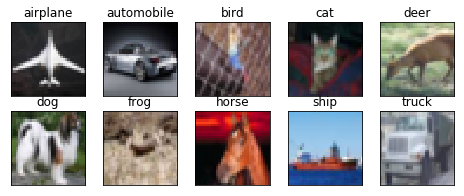

In [8]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [12]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 0.01989002 1.0052702
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same"

In [31]:
!git clone https://github.com/surmenok/keras_lr_finder

Cloning into 'keras_lr_finder'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 44 (delta 2), reused 4 (delta 0), pack-reused 36
Unpacking objects: 100% (44/44), done.


In [0]:
!cp keras_lr_finder/keras_lr_finder/* .

In [13]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [14]:
!git clone https://github.com/yu4u/cutout-random-erasing

fatal: destination path 'cutout-random-erasing' already exists and is not an empty directory.


In [0]:
!cp cutout-random-erasing/* .

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from random_eraser import get_random_eraser

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=True,
                            featurewise_center=True,
                            featurewise_std_normalization=True,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

datagen.fit(train_features)
testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)
testgen.fit(test_features)

Epoch 1/5
50000/50000 [==============================] - 26s 516us/step - loss: 2.3518 - acc: 0.2515
Epoch 2/5
50000/50000 [==============================] - 26s 510us/step - loss: 1.6491 - acc: 0.4096
Epoch 3/5
50000/50000 [==============================] - 26s 512us/step - loss: 1.3277 - acc: 0.5385
Epoch 4/5
50000/50000 [==============================] - 26s 512us/step - loss: 1.1163 - acc: 0.6213
Epoch 5/5
50000/50000 [==============================] - 26s 512us/step - loss: 1.0980 - acc: 0.6519


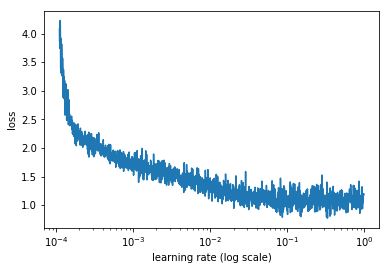

In [36]:
from lr_finder import LRFinder
# model is a Keras model
lr_finder = LRFinder(model1)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(X_train, Y_train, start_lr=0.0001, end_lr=1, batch_size=128, epochs=5)
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

##The loss plateaus after LR of 0.1. I chose 0.01 since these is some decrease in the loss (there is a slope) at 0.01. Though the actual drastic decrease in loss is at 0.001. 

In [17]:
from keras.optimizers import SGD
# Compile the model
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


W0719 12:11:52.466899 140002427946880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=1, validation_steps=100, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=120)`
  if __name__ == '__main__':
W0719 12:12:03.100216 140002427946880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from

Epoch 1/120
390/390 [==============================] - 39s 100ms/step - loss: 1.5745 - acc: 0.4469 - val_loss: 1.2948 - val_acc: 0.5634

Epoch 00001: val_acc improved from -inf to 0.56344, saving model to modelBest.h5
Epoch 2/120
390/390 [==============================] - 36s 92ms/step - loss: 1.2277 - acc: 0.5763 - val_loss: 1.2699 - val_acc: 0.5850

Epoch 00002: val_acc improved from 0.56344 to 0.58500, saving model to modelBest.h5
Epoch 3/120
390/390 [==============================] - 36s 92ms/step - loss: 1.0963 - acc: 0.6257 - val_loss: 1.0208 - val_acc: 0.6522

Epoch 00003: val_acc improved from 0.58500 to 0.65219, saving model to modelBest.h5
Epoch 4/120
390/390 [==============================] - 36s 92ms/step - loss: 1.0065 - acc: 0.6584 - val_loss: 0.8985 - val_acc: 0.6994

Epoch 00004: val_acc improved from 0.65219 to 0.69943, saving model to modelBest.h5
Epoch 5/120
390/390 [==============================] - 36s 93ms/step - loss: 0.9299 - acc: 0.6843 - val_loss: 0.9192 - val

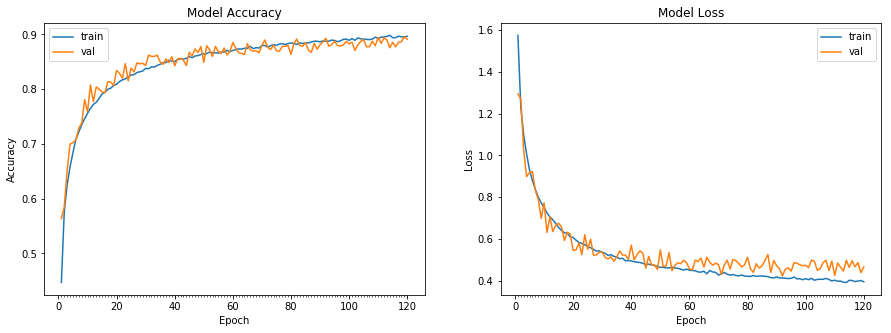

Accuracy on test data is: 45.64


In [18]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('modelBest.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto') 
# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 120, 
                                 validation_data = testgen.flow(X_test, Y_test), verbose=1,validation_steps=100,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model1))

In [0]:
!mv modelBest.h5 modelBest1.h5

In [0]:
from google.colab import files
files.download('modelBest.h5')

In [0]:
from google.colab import files
files.upload()

In [3]:
from keras.models import load_model
modelBest = load_model("modelBest.h5")

W0719 13:43:49.853866 140533125957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 13:43:49.882050 140533125957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 13:43:49.924300 140533125957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 13:43:49.925591 140533125957504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0719 13:43:49.929169 140533125

In [17]:
modelBest.evaluate_generator(datagen.flow(X_test, Y_test), steps=32)

[2.69055262953043, 0.1025390625]

In [0]:
test_generator = datagen.flow(X_test, Y_test,
  shuffle=False)
y_pred = modelBest.predict_generator(test_generator, steps=100) 

In [19]:
misint = []
ip = 0
im = 0
import numpy as np
for p in y_pred:
  #print(p)
  #print(np.argmax(p), y_test[ip])
  if np.argmax(p) != y_test[ip]:
    misint.append(ip)
    im = im + 1
    if im == 25:
      break
  ip = ip +1
print(misint)
 

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [0]:
import keras.backend as K
from skimage import io
import cv2
from google.colab.patches import cv2_imshow

def GradCAM(image, output, last_layer):
  grads = K.gradients(output, last_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([modelBest.input], [pooled_grads, last_layer.output[0]])

  x = np.expand_dims(im, axis=0)
  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(image, 0.5, heatmap, 0.5, 0, dtype = cv2.CV_32F)
  cv2_imshow( image)
  cv2_imshow(superimposed_img)
  return superimposed_img

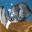

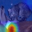

Ground truth: cat
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


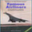

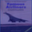

Ground truth: airplane
Prediction: ship



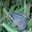

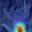

Ground truth: frog
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


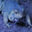

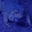

Ground truth: frog
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


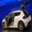

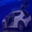

Ground truth: automobile
Prediction: ship



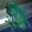

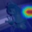

Ground truth: frog
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


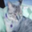

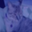

Ground truth: cat
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


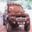

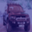

Ground truth: automobile
Prediction: ship



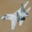

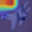

Ground truth: airplane
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


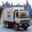

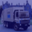

Ground truth: truck
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


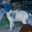

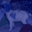

Ground truth: dog
Prediction: ship



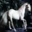

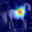

Ground truth: horse
Prediction: ship



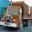

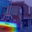

Ground truth: truck
Prediction: ship



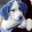

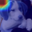

Ground truth: dog
Prediction: ship



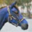

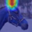

Ground truth: horse
Prediction: ship



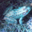

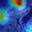

Ground truth: frog
Prediction: ship



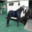

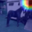

Ground truth: horse
Prediction: ship



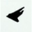

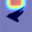

Ground truth: airplane
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


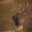

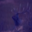

Ground truth: deer
Prediction: ship



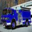

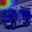

Ground truth: truck
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


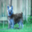

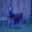

Ground truth: dog
Prediction: ship



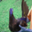

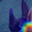

Ground truth: bird
Prediction: ship



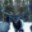

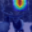

Ground truth: deer
Prediction: ship



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


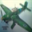

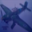

Ground truth: airplane
Prediction: ship



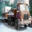

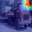

Ground truth: truck
Prediction: ship



<Figure size 2304x1152 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(32,16))
i = 0
for ind in misint:
    #ax = fig.add_subplot(25, 2, 1 + i, xticks=[], yticks=[])
    im = test_features[ind] * 255
    label = test_labels[ind]
    #print(label)
    class_idx = np.where(label[:]==1)[0]
    #print(class_idx)
    pred_class_idx = np.argmax(y_pred[ind])
    class_output = modelBest.output[:, pred_class_idx]
    last_layer = modelBest.get_layer("dropout_3")
    superimposed_img = GradCAM(im, class_output, last_layer)
    print("Ground truth: " + class_names[class_idx[0]])
    print("Prediction: " + class_names[pred_class_idx] +"\n")
    #ax.set_title
    #plt.imshow(test_features[ind])
    #ax = fig.add_subplot(25, 2, 2 + i, xticks=[], yticks=[])
    #plt.imshow(superimposed_img)
    i = i + 1
#plt.show()